# Demonstration of using an association function available in ``nmcog``

The demonstration will be for a three-way function. For a overview of this function refer to the [guidebook](https://nmcog.readthedocs.io/en/latest/_static/Applying_Association.html).

## Import `NEAL3Way` as a cognitive function

In [1]:
from nmcog.spinnaker.associate import NEAL3Way

Detected PyNN version 0.9.4 and Neo version 0.8.0


## Setup the association
One may think of a three-way association in terms of subject-predicate-object. Therefore, the set-up must first define the list of subjects, **a minumum of two subjects**. Below are some example,
```
bases["units"] = ["animal", "mammal"]
bases["units"] = ["animal", "mammal", "bird", "canary"]
bases["units"] = ["animal", "mammal", "bird", "rock"]
```
However for for subjects in addition to defining them in a list one must also define how one of the subjects *is related* related to any of the remaining subjects in the defined list of subjects. A **minimum of one is-a** relation is required. For example,
```
bases["is-a"] = [ ["mammal", "animal"] ]
bases["is-a"] = [ ["canary", "bird"], ["bird", "animal"], ["mammal", "animal"] ]
bases["is-a"] = [ ["mammal", "animal"], ["bird", "animal"] ]
```
Think of these as set of subjects and the set of relationships between the subjects.

The *object* i.e. the property of the subject is also defined as list.
```
associate["properties"] = ["food", "fur"]
associate["properties"] = ["food", "fur", "flying", "yellow"]
associate["properties"] = ["food", "fur", "yellow", "feather", "hard"]
```
Notice that these are the properties to be associated between base units and its predicate.

Similarly, the *predicate* i.e. the relation is represented as a list, the set of possible relations between the above defined set of possible subjects and the set of possible objects.
```
associate["relations"] = ["eats", "has", "likes"]
associate["relations"] = ["eats", "likes", "travels", "has", "colored"]
associate["relations"] = ["eats", "has", "likes", "colored", "with"]
```

Finally the set of possible associations, i.e. the connections between a subject and an object via a predicate is defined.
```
associate["connections"] = [ ["animal", "eats", "food"], ["mammal", "has", "fur"] ]
associate["connections"] = [ ["animal", "eats", "food"], ["mammal", "has", "fur"], ["bird", "travels", "flying"], ["canary", "colored", "yellow"] ]
associate["connections"] = [ ["animal", "eats", "food"], ["mammal", "has", "fur"], ["bird", "with", "feather"] ]
```

Although above shows the set-up in steps they are defined in two parameters as shown for each example below,

**Example 1**
```
bases = {"units": ["animal", "mammal"],
         "is-a": [ ["mammal", "animal"] ]}
associate = {"properties": ["food", "fur"],
             "relations": ["eats", "has", "likes"],
             "connections": [ ["animal", "eats", "food"], ["mammal", "has", "fur"] ] }
```

**Example 2**
```
bases = {"units": ["animal", "mammal", "bird", "canary"],
         "is-a": [ ["canary", "bird"], ["bird", "animal"], ["mammal", "animal"] ]}
associate = {"properties": ["food", "fur", "flying", "yellow"],
             "relations": ["eats", "likes", "travels", "has", "colored"],
             "connections": [ ["animal", "eats", "food"], ["mammal", "has", "fur"],
                              ["bird", "travels", "flying"], ["canary", "colored", "yellow"]] }
```

**Example 3**
```
bases = {"units": ["animal", "mammal", "bird", "rock"],
         "is-a": [ ["mammal", "animal"], ["bird", "animal"] ]}
associate = {"properties": ["food", "fur", "yellow", "feather", "hard"],
             "relations": ["eats", "has", "likes", "colored", "with"],
             "connections": [ ["animal", "eats", "food"], ["mammal", "has", "fur"], ["bird", "with", "feather"]
                              ] }
```

**Example 4**
```
bases = {"units": ["animal", "mammal", "bird", "rock"],
         "is-a": [ ["mammal", "animal"], ["bird", "animal"] ]}
associate = {"properties": ["food", "fur", "yellow", "feather", "hard"],
             "relations": ["eats", "has", "likes", "colored", "gives"],
             "connections": [ ["animal", "eats", "food"], ["mammal", "has", "fur"], ["bird", "has", "feather"]
                              ] }
```

In [2]:
# Example 4
bases = {"units": ["animal", "mammal", "bird", "rock"],
         "is-a": [ ["mammal", "animal"], ["bird", "animal"] ]}
associate = {"properties": ["food", "fur", "yellow", "feather", "hard"],
             "relations": ["eats", "has", "likes", "colored", "gives"],
             "connections": [ ["animal", "eats", "food"], ["mammal", "has", "fur"], ["bird", "has", "feather"]
                              ] }

## Choose `turnon` options
That is, choose if you want to turn on all the associations in the set of possible connections or just some desired association defined in the set of possible connections

In [3]:
x = "all"
#x = ["animal", "food", "eats"]
#x = ["animal", "food"]
#x = ["mammal", "fur", "has"]

## Run it

In [4]:
%%capture
assos = NEAL3Way(bases, associate, turnon=x)

Created spalloc job 5336709
Waiting for board power commands to complete.


## Visualize it

### View all in one time series plot
By default the figure is a plot of spike trains for the subjects, objects, and predicates.

<IPython.core.display.Javascript object>


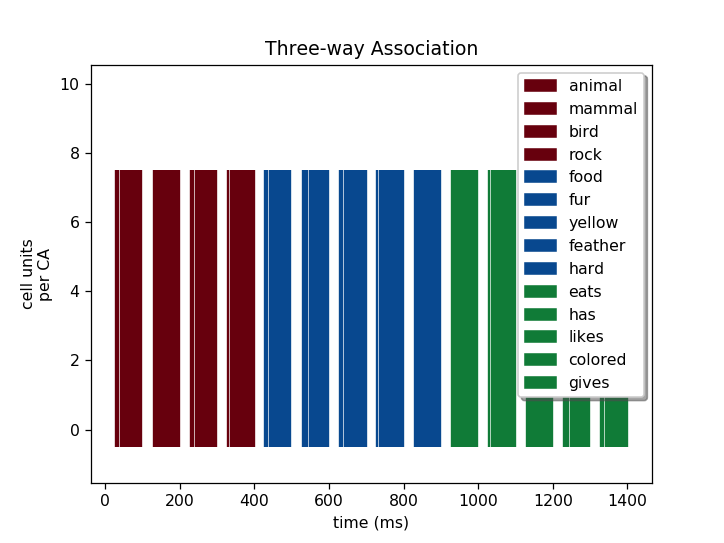

In [6]:
assos.plot_all()

However the default plotting (above) can be busy for large sets. One can can then choose to plot them in respective plots for subjects, objects, and predicates as shown below.

<IPython.core.display.Javascript object>


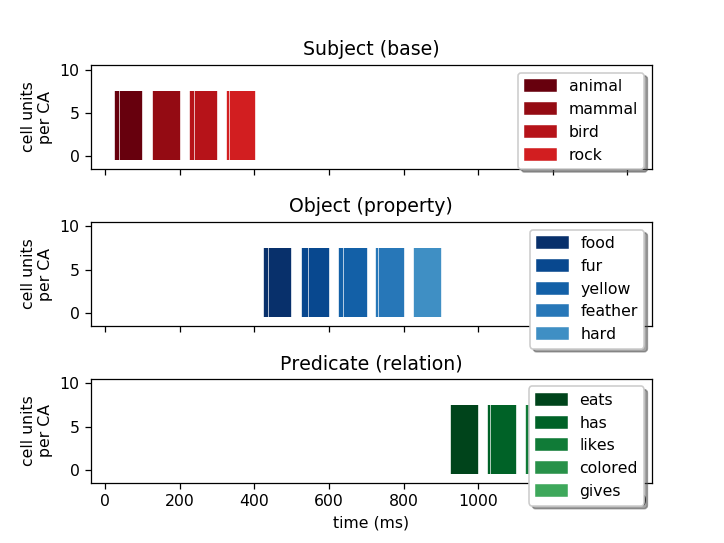

In [7]:
assos.plot_all(form="2")

### View for a specific combination of subject-object-predicate

For subject-object-predicate of animal-food-eats

<IPython.core.display.Javascript object>


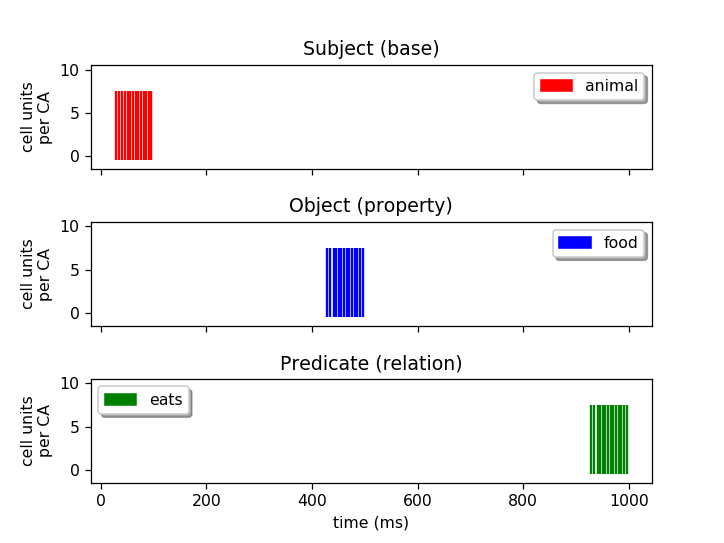

In [9]:
assos.plot_specific(basename="animal", relname="eats", propname="food")

Note that the triplet subject-object-predicate does not have to be those that are defined in the set of possible connections. For example, for animal-food-colored

<IPython.core.display.Javascript object>


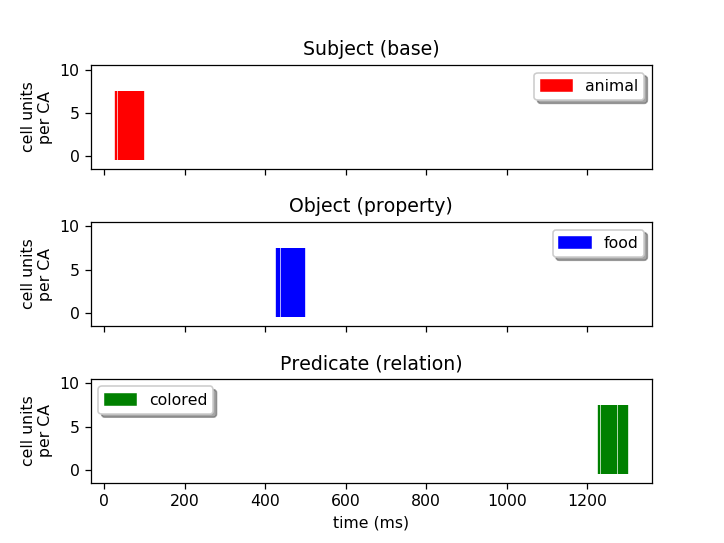

In [10]:
assos.plot_specific(basename="animal", relname="colored", propname="food")

## Get simulation results.

Also, the user can get the results ([Neo SpikeTrains](https://neo.readthedocs.io/en/stable/api_reference.html#neo.core.SpikeTrain)) for further analysis.

In [11]:
sim_result = assos.get_results()

The result is a dictionary whose keys correspond to subject, object, and predicates defined prior to running the function.

In [15]:
print(sim_result.keys())

dict_keys(['base', 'property', 'relation'])


Furthermore, the values for the keys are also dictionaries as shown below.

In [16]:
print(sim_result["base"].keys())

dict_keys(['all', 'animal', 'mammal', 'bird', 'rock'])


Note apart from the "all" key others are self explanatory. The "all" key contains spike trains for all the subjects in one container.